In [60]:
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [61]:
# Load NIAID queries

queries_df = pd.read_csv('./niaid_queries_revisited.csv', sep=',')
queries_df

,combination,search term,result id
0,original query,influenza,PRJNA658522
1,original query,influenza,PRJNA658529
2,original query,influenza,PRJNA658552
3,original query,influenza,PRJNA658564
4,original query,influenza,PRJNA658562
...,...,...,...
3995,c15,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,c15,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,c15,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,c15,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [62]:
# Drop combination column

queries_df = queries_df.drop('combination', axis = 1).copy()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3995,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [63]:
# Drop duplicates

queries_df = queries_df.drop_duplicates()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3917,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3924,hiv,DRYAD_doi.org:10.5061:dryad.wpzgmsbnz
3936,hiv,DRYAD_doi.org:10.5061:dryad.np5hqbzx5
3968,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df


In [64]:
# Load ranked analysis

ranked_df = pd.read_csv('./ranked_analysis_revisited.csv', sep=',')
ranked_df

,result id,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15
0,S-EPMC6040727,1.5,1.333333,1.333333,1.2,0.000000,0.000000,1.333333,1.333333,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,Mendeley_pzp26k9fy7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.400000,1.400000,0.000000,0.0,0.0,0.000000,0.000000
2,DRYAD_doi.org:10.5061:dryad.9r35r,0.0,0.000000,3.666667,11.0,22.000000,11.000000,0.000000,7.333333,22.0,22.000000,22.000000,2.444444,11.0,22.0,22.000000,22.000000
3,veupathdb_DS_e8c4cf2187,0.0,0.000000,0.000000,0.0,2.200000,3.666667,0.000000,0.000000,0.0,1.833333,3.666667,0.000000,0.0,0.0,0.000000,1.100000
4,Dataverse_10.5064_F6SF2T3N,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.857143,2.166667,0.000000,0.0,0.0,2.600000,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,ZENODO_5044544,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.300000,1.625000
477,ZENODO_5008681,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.700000
478,S-EPMC6256666,1.7,1.700000,0.000000,0.0,0.000000,0.000000,1.700000,0.000000,0.0,0.000000,0.000000,1.700000,0.0,0.0,0.000000,0.000000
479,IMMPORT_SDY1515_2,0.0,0.000000,0.000000,0.0,6.333333,9.500000,0.000000,0.000000,0.0,3.800000,9.500000,0.000000,0.0,0.0,2.375000,3.800000


In [65]:
# Add search result scope info to ranked analysios data

ranked_df = ranked_df.merge(queries_df[['result id', 'search term']], 
                            how = 'left', on = 'result id').copy()
ranked_df

,result id,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15,search term
0,S-EPMC6040727,1.5,1.333333,1.333333,1.2,0.000000,0.000000,1.333333,1.333333,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,AIDS
1,Mendeley_pzp26k9fy7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.400000,1.400000,0.000000,0.0,0.0,0.000000,0.000000,AIDS
2,DRYAD_doi.org:10.5061:dryad.9r35r,0.0,0.000000,3.666667,11.0,22.000000,11.000000,0.000000,7.333333,22.0,22.000000,22.000000,2.444444,11.0,22.0,22.000000,22.000000,AIDS
3,veupathdb_DS_e8c4cf2187,0.0,0.000000,0.000000,0.0,2.200000,3.666667,0.000000,0.000000,0.0,1.833333,3.666667,0.000000,0.0,0.0,0.000000,1.100000,AIDS
4,Dataverse_10.5064_F6SF2T3N,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.857143,2.166667,0.000000,0.0,0.0,2.600000,4.333333,AIDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,ZENODO_5044544,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.300000,1.625000,zika microcephaly
477,ZENODO_5008681,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.700000,zika microcephaly
478,S-EPMC6256666,1.7,1.700000,0.000000,0.0,0.000000,0.000000,1.700000,0.000000,0.0,0.000000,0.000000,1.700000,0.0,0.0,0.000000,0.000000,zika microcephaly
479,IMMPORT_SDY1515_2,0.0,0.000000,0.000000,0.0,6.333333,9.500000,0.000000,0.000000,0.0,3.800000,9.500000,0.000000,0.0,0.0,2.375000,3.800000,sublingual immunotherapy


In [66]:
duplicate_results = ranked_df[ranked_df.duplicated(['result id'])]
duplicate_results

,result id,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15,search term


In [67]:
combi_columns = ['original query', 'combi 1', 'combi 2', 'combi 3', 'combi 4', 'combi 5', 'combi 6', 'combi 7',
                 'combi 8', 'combi 9', 'combi 10', 'combi 11', 'combi 12', 'combi 13', 'combi 14', 'combi 15'
                ]

In [68]:
combination_order = ['combi 1', 'combi 2', 'combi 3', 'combi 4', 'combi 5', 'combi 6',
                     'combi 7', 'combi 8', 'combi 9', 'combi 10', 'combi 11', 'combi 12', 'combi 13',
                     'combi 14', 'combi 15']

In [69]:
def compute_scores(df, combi_columns):
    final_df = pd.DataFrame()

    for combi in combi_columns:
        df_comb = df[['search term', combi]].copy()
        df_comb_sum = df_comb.groupby('search term').sum().reset_index()
        if final_df.empty:
            final_df = df_comb_sum
        else: 
            final_df = final_df.merge(df_comb_sum, on = 'search term')

    final_df.columns = ['search term'] + combi_columns
    return final_df

In [70]:
def perform_wilcoxon_test(data):
    data = data.drop('search term', axis = 1)
    # Get the column names
    columns = data.columns
    
    # Initialize a list to hold the results
    results = []
    
    # Perform the Wilcoxon signed-rank test for each pair of columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            stat, p = wilcoxon(data[col1], data[col2])
            results.append((col1, col2, stat, p))
            
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results, columns=['set 1', 'set 2', 'statistic', 'p-value'])
    return results_df

In [71]:
def compare_scores(scores, columns):
    score_comparisons = {}
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            set1 = columns[i]
            set2 = columns[j]
            if scores[set1] > scores[set2]:
                score_comparisons[(set1, set2)] = set1
            else:
                score_comparisons[(set1, set2)] = set2
    return score_comparisons

In [72]:
def add_winner(row):
    set1, set2 = row['set 1'], row['set 2']
    return winners[(set1, set2)]

In [73]:
def swap_sets(row):
    s1_index = combination_order.index(row['set 1'])
    s2_index = combination_order.index(row['set 2'])
    if s2_index < s1_index:
        return pd.Series([row['set 1'], row['set 2'], row['p-value']])  
    else:
        return pd.Series([row['set 2'], row['set 1'], row['p-value']])

In [74]:
def create_heatmap_with_winners(df, title, filename):
    heatmap_data = df.pivot('set 1', 'set 2', 'p-value')

    # Reorder index and columns
    heatmap_data = heatmap_data.reindex(combination_order, axis = 0)
    heatmap_data = heatmap_data.reindex(combination_order, axis = 1)

    # Combine winner and p-value in the annotation
    formatted_text = np.empty(heatmap_data.shape, dtype = object)
    
    for i in range(len(combination_order)):
        for j in range(len(combination_order)):
            if not np.isnan(heatmap_data.iloc[i, j]):
                formatted_text[i, j] = "{}\n{:.3f}".format(df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['winner'].values[0], df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['p-value'].values[0])
        else:
            formatted_text[i, j] = ""

    # Create heatmap using seaborn
    sns.set(font_scale = 1.2)
    sns.set_style('white')
    plt.figure(figsize = (24, 12))
    sns.heatmap(heatmap_data, cmap='BuPu_r', annot=formatted_text, fmt="", cbar_kws={'label': 'p-values'})
    plt.title(f'{title}')
    plt.savefig(f'../alternate_test/results/{filename}.png', dpi = 100)
    plt.show()

In [75]:
# Calculate scores per search term per combination

scores_df = compute_scores(ranked_df, combi_columns)
scores_df

,search term,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15
0,AIDS,48.323016,47.992857,49.611905,52.412302,52.680159,48.588492,47.892857,51.427381,53.659127,52.012698,50.191270,48.938492,52.681746,52.825397,50.786508,50.107937
1,addison's disease,46.199206,46.199206,46.599206,45.584921,45.551587,46.501587,46.199206,46.596825,45.918254,45.551587,46.534921,46.199206,46.596825,46.501587,45.551587,46.534921
2,allergen skin prick test,41.686111,41.722222,41.722222,40.866667,40.844444,41.322222,41.722222,41.722222,40.852778,41.296825,41.144444,41.700000,41.722222,41.746825,41.546825,41.122222
3,allergy treatment,36.311111,42.254762,43.904762,45.829762,46.657540,46.603968,42.726984,43.004762,45.592857,47.437302,47.443651,42.277778,42.966667,45.031746,47.750794,48.427778
4,asthma,45.394048,48.527381,49.685317,49.715079,49.984921,50.785317,48.527381,49.285317,49.715079,50.429365,51.115079,48.323810,48.618651,49.066270,49.737698,50.932540
5,cancer,40.577778,45.148413,47.070635,50.026587,51.784524,52.486111,44.841667,46.593254,50.159921,50.169048,52.486111,44.233730,44.787302,45.804365,46.343254,47.048016
6,dendritic cells,50.283333,52.356349,53.173810,52.938492,52.859921,53.717460,52.324603,53.077778,52.943651,52.829365,53.667460,52.324603,51.907937,52.251587,52.301587,52.829365
7,gwas,45.092857,51.761508,53.381349,53.393254,54.853175,54.498016,51.761508,53.298016,53.998016,54.799603,54.311508,51.761508,53.067460,54.056349,54.155159,54.354365
8,hiv,35.333333,49.487302,49.625794,50.416270,51.249603,57.277381,49.581349,53.213889,53.149603,52.716270,53.066270,52.316270,53.673016,53.673016,53.645238,53.634127
9,immunotherapeutics,57.660317,57.660317,57.760317,57.760317,57.760317,57.760317,57.660317,57.660317,57.760317,57.760317,57.760317,57.660317,57.660317,57.760317,57.760317,57.831746


In [76]:
# Run Wilcoxon test

wilcoxon_df = perform_wilcoxon_test(scores_df)
wilcoxon_df

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,set 1,set 2,statistic,p-value
0,original query,combi 1,8.0,0.000187
1,original query,combi 2,22.0,0.000032
2,original query,combi 3,32.0,0.000162
3,original query,combi 4,65.0,0.007371
4,original query,combi 5,74.0,0.015973
...,...,...,...,...
115,combi 12,combi 14,135.0,0.668235
116,combi 12,combi 15,112.0,0.181730
117,combi 13,combi 14,119.0,0.563342
118,combi 13,combi 15,134.0,0.457846


In [77]:
# Export scores per search term

scores_df.to_csv('../alternate_test/results/scores.csv', index = False)

In [78]:
# Export Wilcoxon test results

wilcoxon_df.to_csv('../alternate_test/results/wilcoxon.csv', index = False)

In [79]:
# Drop search term column

scores_only_df = scores_df.drop(columns = ['search term'])
scores_only_df

,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15
0,48.323016,47.992857,49.611905,52.412302,52.680159,48.588492,47.892857,51.427381,53.659127,52.012698,50.191270,48.938492,52.681746,52.825397,50.786508,50.107937
1,46.199206,46.199206,46.599206,45.584921,45.551587,46.501587,46.199206,46.596825,45.918254,45.551587,46.534921,46.199206,46.596825,46.501587,45.551587,46.534921
2,41.686111,41.722222,41.722222,40.866667,40.844444,41.322222,41.722222,41.722222,40.852778,41.296825,41.144444,41.700000,41.722222,41.746825,41.546825,41.122222
3,36.311111,42.254762,43.904762,45.829762,46.657540,46.603968,42.726984,43.004762,45.592857,47.437302,47.443651,42.277778,42.966667,45.031746,47.750794,48.427778
4,45.394048,48.527381,49.685317,49.715079,49.984921,50.785317,48.527381,49.285317,49.715079,50.429365,51.115079,48.323810,48.618651,49.066270,49.737698,50.932540
5,40.577778,45.148413,47.070635,50.026587,51.784524,52.486111,44.841667,46.593254,50.159921,50.169048,52.486111,44.233730,44.787302,45.804365,46.343254,47.048016
6,50.283333,52.356349,53.173810,52.938492,52.859921,53.717460,52.324603,53.077778,52.943651,52.829365,53.667460,52.324603,51.907937,52.251587,52.301587,52.829365
7,45.092857,51.761508,53.381349,53.393254,54.853175,54.498016,51.761508,53.298016,53.998016,54.799603,54.311508,51.761508,53.067460,54.056349,54.155159,54.354365
8,35.333333,49.487302,49.625794,50.416270,51.249603,57.277381,49.581349,53.213889,53.149603,52.716270,53.066270,52.316270,53.673016,53.673016,53.645238,53.634127
9,57.660317,57.660317,57.760317,57.760317,57.760317,57.760317,57.660317,57.660317,57.760317,57.760317,57.760317,57.660317,57.660317,57.760317,57.760317,57.831746


In [80]:
# Compute total scores per combination

total_scores_df = scores_only_df.sum()
total_scores_df

original query    1175.910714
combi 1           1255.108333
combi 2           1260.477778
combi 3           1260.590079
combi 4           1253.963095
combi 5           1258.563492
combi 6           1252.867460
combi 7           1262.357540
combi 8           1264.215079
combi 9           1251.035317
combi 10          1256.543651
combi 11          1251.669841
combi 12          1259.088095
combi 13          1262.699603
combi 14          1257.699603
combi 15          1263.907937
dtype: float64

In [81]:
# Determine winners by comparing combination scores

winners = compare_scores(total_scores_df, combi_columns)
winners

{('original query', 'combi 1'): 'combi 1',
 ('original query', 'combi 2'): 'combi 2',
 ('original query', 'combi 3'): 'combi 3',
 ('original query', 'combi 4'): 'combi 4',
 ('original query', 'combi 5'): 'combi 5',
 ('original query', 'combi 6'): 'combi 6',
 ('original query', 'combi 7'): 'combi 7',
 ('original query', 'combi 8'): 'combi 8',
 ('original query', 'combi 9'): 'combi 9',
 ('original query', 'combi 10'): 'combi 10',
 ('original query', 'combi 11'): 'combi 11',
 ('original query', 'combi 12'): 'combi 12',
 ('original query', 'combi 13'): 'combi 13',
 ('original query', 'combi 14'): 'combi 14',
 ('original query', 'combi 15'): 'combi 15',
 ('combi 1', 'combi 2'): 'combi 2',
 ('combi 1', 'combi 3'): 'combi 3',
 ('combi 1', 'combi 4'): 'combi 1',
 ('combi 1', 'combi 5'): 'combi 5',
 ('combi 1', 'combi 6'): 'combi 1',
 ('combi 1', 'combi 7'): 'combi 7',
 ('combi 1', 'combi 8'): 'combi 8',
 ('combi 1', 'combi 9'): 'combi 1',
 ('combi 1', 'combi 10'): 'combi 10',
 ('combi 1', 'com

In [82]:
# Add winners to Wilcoxon test results

wilcoxon_df['winner'] = wilcoxon_df.apply(add_winner, axis = 1)
wilcoxon_df

,set 1,set 2,statistic,p-value,winner
0,original query,combi 1,8.0,0.000187,combi 1
1,original query,combi 2,22.0,0.000032,combi 2
2,original query,combi 3,32.0,0.000162,combi 3
3,original query,combi 4,65.0,0.007371,combi 4
4,original query,combi 5,74.0,0.015973,combi 5
...,...,...,...,...,...
115,combi 12,combi 14,135.0,0.668235,combi 12
116,combi 12,combi 15,112.0,0.181730,combi 15
117,combi 13,combi 14,119.0,0.563342,combi 13
118,combi 13,combi 15,134.0,0.457846,combi 15


In [83]:
# Export Wilcoxon test results

wilcoxon_df.to_csv('../alternate_test/results/wilcoxon_with_winners.csv', index = False)

In [84]:
# Remove original query rows

wilcoxon_df = wilcoxon_df[(wilcoxon_df['set 1'] != 'original query') & 
                          (wilcoxon_df['set 2'] != 'original query')].copy()
wilcoxon_df

,set 1,set 2,statistic,p-value,winner
15,combi 1,combi 2,47.0,0.017270,combi 2
16,combi 1,combi 3,103.0,0.287092,combi 3
17,combi 1,combi 4,116.0,0.331335,combi 1
18,combi 1,combi 5,129.0,0.548506,combi 5
19,combi 1,combi 6,17.0,0.084379,combi 1
...,...,...,...,...,...
115,combi 12,combi 14,135.0,0.668235,combi 12
116,combi 12,combi 15,112.0,0.181730,combi 15
117,combi 13,combi 14,119.0,0.563342,combi 13
118,combi 13,combi 15,134.0,0.457846,combi 15


In [85]:
# Rearrange rows so that heatmap cells are rendered below the main diagonal

wilcoxon_df[['set 1', 'set 2', 'p-value']] = wilcoxon_df.apply(swap_sets, axis = 1)

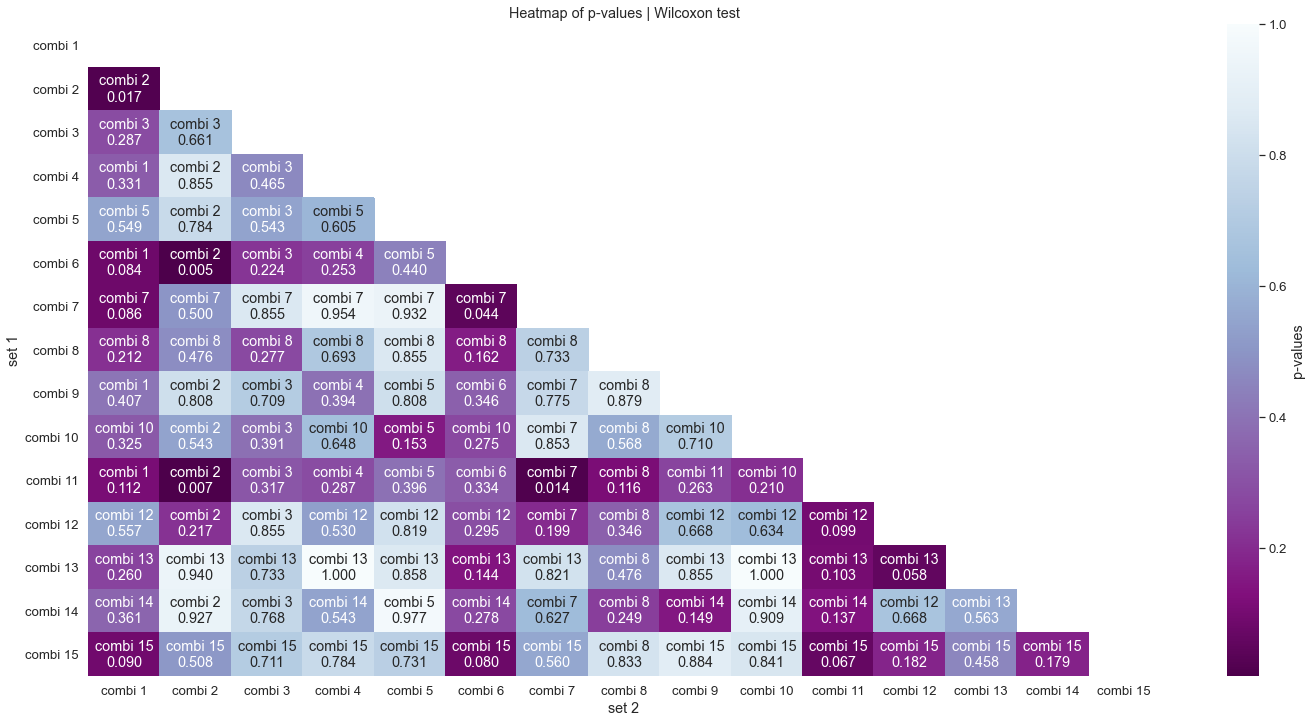

In [86]:
# Generate heatmap of p-values with winners

create_heatmap_with_winners(wilcoxon_df, 'Heatmap of p-values | Wilcoxon test', 'wilcoxon_heatmap_with_winners')